<img src='images/pic1.jpg'/>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

# Stack Overflow: Tag Prediction

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted in Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


<h2> 1.2 Sources / useful links </h2>

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
yourtube : https://youtu.be/nNDqbUhtIRg <br>
research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Predict as man labels as possible correctly.
2. No strict latency constaraint.
3. Cost of errors would be a bad customer experience.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6034195 rows. The column in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3>2.1.2 Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<p> It is a multilable classification problem  <br>
<b>Multilable Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A text might be about any of religion, politics, finance or education at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html
</p>

<h3>2.2.2 Performance metric </h3>

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

'micro f1 score': <br>
Calculate metrics globally by counting the total true positives, false negatives and false positives.
<br>

'macro f1 score':<br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

<h3> 2.2.3 Machine Learning Objectives and Constraints </h3>

1. Minimize Micro avg F1 Score.
2. Try out multiple startegies for Multi-label classification.

#             

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

<h3>3.1.1 Using Pandas with SQLite to Load the data</h3>

In [2]:
#Loading the dataset using pandas
start=datetime.now()
data=pd.read_csv('Train.csv')

In [3]:
print("Total Number of data points are {0}".format(data.shape[0]))
print("Total Number of columns are {0}".format(data.shape[1]))

Total Number of data points are 6034195
Total Number of columns are 4


In [4]:
#Sample
print(data['Body'][100])

<p>I am using some legacy code to return an Excel worksheet as a Dataset.  However, when I iterate over the resulting data set it seems that not all of the cells are there.  The Excel sheet that is being read has some merged cells and I am wondering if that is the problem.  Here is the code:</p>

<pre><code>private DataSet Get_Spreadsheet_Data(string strFileName, string strSheetName)
{
    DataSet ds = new DataSet();
    string strConnectionString = "Provider=Microsoft.Jet.OLEDB.4.0;" + "Data Source=" + strFileName + ";" + "Extended Properties=Excel 8.0;";
    OleDbConnection objConn = new OleDbConnection(strConnectionString);
    try
    {
        objConn.Open();
        OleDbCommand objCmdSelect = new OleDbCommand("SELECT * FROM [" + strSheetName + "$]", objConn);
        OleDbDataAdapter objAdapter1 = new OleDbDataAdapter();
        objAdapter1.SelectCommand = objCmdSelect;
        objAdapter1.Fill(ds);
    }
    catch (Exception Ex)
    {
        //litOutput.Text = "&lt;span style=

<h3>3.1.3 Checking for duplicates </h3>

In [5]:
duplicate_data=data.duplicated(subset=['Title','Body','Tags'])

In [7]:
final_dup=data[duplicate_data]
final_dup.head()

,Id,Title,Body,Tags
3550,3551,Compatibility issues with <a> and calling a fu...,<p>I am new to javascript. I wrote the followi...,function anchor
5246,5247,Using JTA with Spring +hibernate JPA+Glassfish...,<p>I have been struggling with this issues and...,spring hibernate jpa glassfish jta
9968,9969,Groovy Properties Assertion Fails,<p>Here is the content of my groovy file:</p>\...,properties groovy assert
10597,10598,Importance of isomorphic functions,<p><strong>Short Question:</strong> What is th...,functional-programming isomorphism
10939,10940,VB6 Form.Show is not working,<p>I have a project with graphs that can be pr...,forms vb6


In [8]:
print("Total Number of duplicate questions are {0}".format(final_dup.shape[0]))

Total Number of duplicate questions are 1827881


In [9]:
#Removing Duplicates from the data
final_data=data.drop_duplicates(subset=['Title','Body','Tags'])
final_data.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [10]:
print(final_data.shape)

(4206314, 4)


In [11]:
def get_tag_count(df):
    arr=[]
    for text in df['Tags']:
        arr.append(len(str(text).
                       split()))
    return arr;

In [12]:
type(final_data["Tags"][0])

str

In [13]:
tags_count=get_tag_count(final_data)

In [14]:
final_data['Tag_Count']=tags_count
print(final_data['Tag_Count'].value_counts())

3    1206157
2    1111706
4     814996
1     568297
5     505158
Name: Tag_Count, dtype: int64


In [15]:
print("{0} of questions have 3 tags".format(final_data['Tag_Count'].value_counts()[3]/(len(final_data))*100))
print("{0} of questions have 2 tags".format(final_data['Tag_Count'].value_counts()[2]/(len(final_data))*100))
print("{0} of questions have 1 tag".format(final_data['Tag_Count'].value_counts()[1]/(len(final_data))*100))

28.674915852691928 of questions have 3 tags
26.42945819071044 of questions have 2 tags
13.510570062054331 of questions have 1 tag


1.So There are more number of questions having number of tags as 2 and 3.As you can see above,more than 64 % of the questions have atleast 2 tags. 

<h2> 3.2 Analysis of Tags </h2>

<h3> 3.2.1 Total number of unique tags </h3>

In [16]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.

#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(final_data['Tags'].values.astype('U'))

In [17]:
print("Number of data points :", final_data.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 4206314
Number of unique tags : 42048


In [18]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tages we have :", tags[:10])

Some of the tages we have : ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store']


<h3> 3.2.3 Number of times a tag appeared </h3>

In [19]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [21]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [22]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

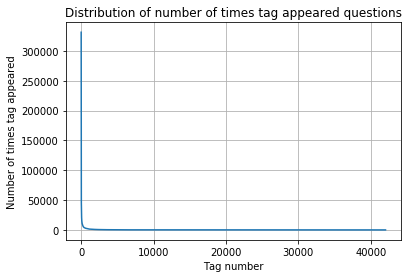

In [23]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

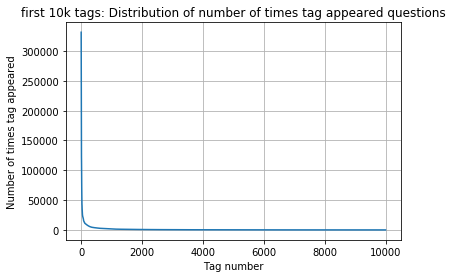

400 [331505  44829  22429  17728  13364  11162  10029   9148   8054   7151
   6466   5865   5370   4983   4526   4281   4144   3929   3750   3593
   3453   3299   3123   2986   2891   2738   2647   2527   2431   2331
   2259   2186   2097   2020   1959   1900   1828   1770   1723   1673
   1631   1574   1532   1479   1448   1406   1365   1328   1300   1266
   1245   1222   1197   1181   1158   1139   1121   1101   1076   1056
   1038   1023   1006    983    966    952    938    926    911    891
    882    869    856    841    830    816    804    789    779    770
    752    743    733    725    712    702    688    678    671    658
    650    643    634    627    616    607    598    589    583    577
    568    559    552    545    540    533    526    518    512    506
    500    495    490    485    480    477    469    465    457    450
    447    442    437    432    426    422    418    413    408    403
    398    393    388    385    381    378    374    370    367    365
  

In [24]:
plt.plot(tag_counts[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:10000:25]), tag_counts[0:10000:25])

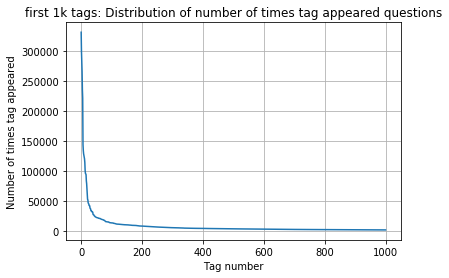

200 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3482
   3453   3427   3396   3363   3326   3299   3272   3232   3196   3168
   3123   3094   3073   3050   3012   2986   2983   2953   2934   2903
   2891   2844   2819   2784   2754   2738   2726   2708   2681   2669
   2647   2621   2604   2594   2556   2527   2510   2482   2460   2444
  

In [25]:
plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

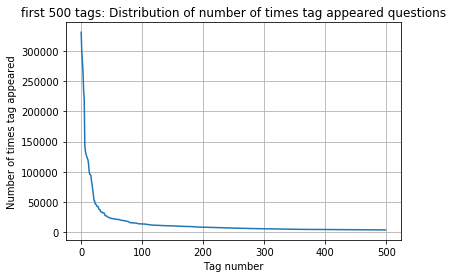

100 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3482]


In [26]:
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

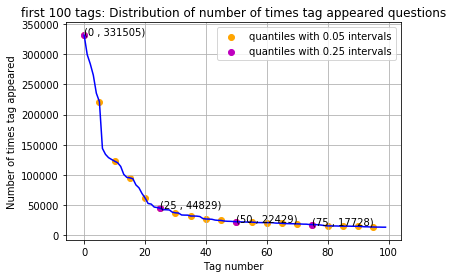

20 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703]


In [27]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [28]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags
#Print the length of the list
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))
# Store tags greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
#Print the length of the list.
print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

153 Tags are used more than 10000 times
14 Tags are used more than 100000 times


<b>Observations:</b><br />
1. There are total 153 tags which are used more than 10000 times.
2. 14 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 331505 times.

<h3> 3.2.4 Tags Per Question </h3>

In [29]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
#Converting each value in the 'tag_quest_count' to integer.
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 4206314 datapoints.
[5, 1, 3, 3, 3]


In [30]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.899440


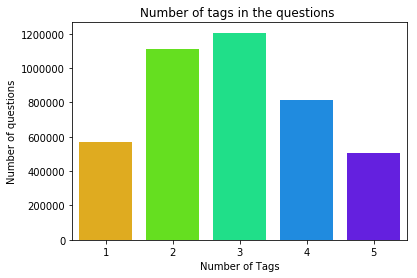

In [31]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899
4. Most of the questions are having 2 or 3 tags

<h3>3.2.5 Most Frequent Tags </h3>

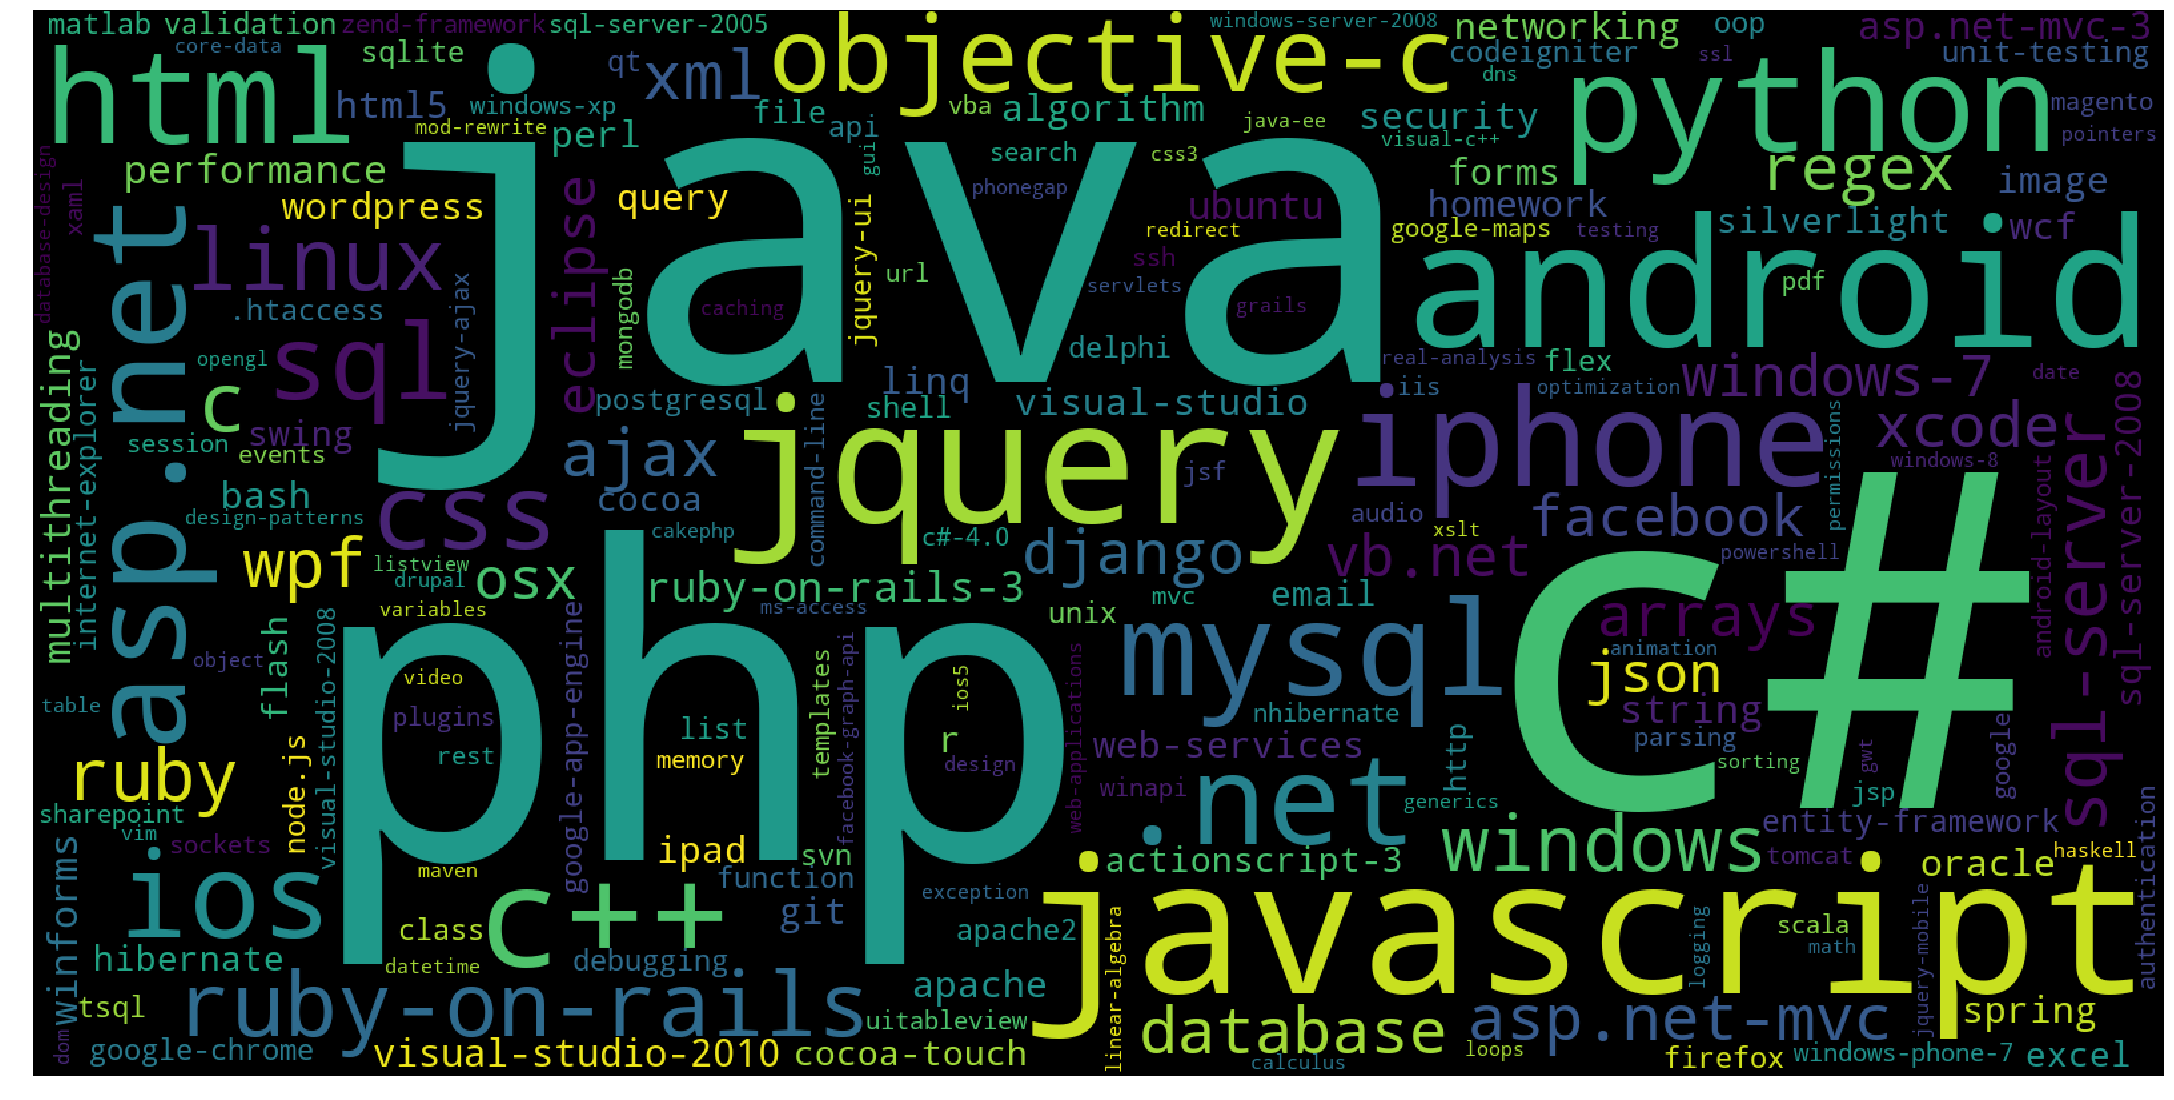

Time taken to run this cell : 0:00:08.670108


In [32]:
# Ploting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

<h3> 3.2.6 The top 20 tags </h3>

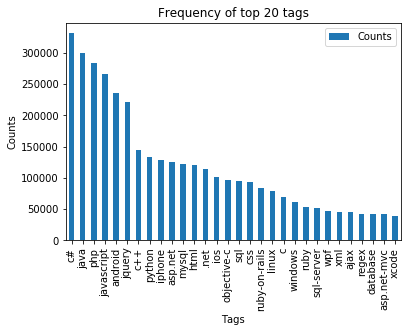

In [33]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

<h3> 3.3 Cleaning and preprocessing of Questions </h3>

<h3> 3.3.1 Preprocessing </h3>

<ol> 
    <li> Sample 1M data points </li>
    <li> Separate Code from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [34]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [ ]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/

start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:

    is_code = 0

    title, question, tags = row[0], row[1], row[2]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

In [ ]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table
start = datetime.now()
read_db = 'train_no_dup.db'
write_db = 'Processed.db'
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 1000000;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
print("Time taken to run this cell :", datetime.now() - start)

__ we create a new data base to store the sampled and preprocessed questions __

In [35]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/
from tqdm import tqdm
def text_preprocessing(df):
    
    start = datetime.now()
    preprocessed_data=[]
    #reader.fetchone()
    questions_with_code=0
    len_pre=0
    len_post=0
    questions_proccesed = 0
    for index,row in tqdm(df.iterrows()):

        is_code = 0

        title, question, tags = row['Title'], row['Body'], row['Tags']

        if '<code>' in question:
            questions_with_code+=1
            is_code = 1
        x = len(question)+len(title)
        len_pre+=x

        code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
        question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
        question=striphtml(question.encode('utf-8'))

        title=title.encode('utf-8')

        question=str(title)+" "+str(question)+ " "+ str(title) + " " + str(title)
        question=re.sub(r'[^A-Za-z]+',' ',question)
        words=word_tokenize(str(question.lower()))

        #Removing all single letter and and stopwords from question exceptt for the letter 'c'
        question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    
        len_post+=len(question)
        #print(question)
        tup = (question,code,tags,x,len(question),is_code)
        questions_proccesed += 1
        preprocessed_data.append(tup)
    return preprocessed_data

In [37]:
def count_href(df):
    href_count=[]
    for text in df['Body'].values:
        count=0
        if 'href' in text.split(" "):
            count=count+ text.split(" ").count('href')
        href_count.append(count)
    return href_count

<h1>Feature Engineering </h1>

In [38]:
def count_code_segments(df):
    code_count=[]
    html_count=[]
    for text in df['Body'].values:
        #code_count=0;
        if '<code>' in text.split(" "):
             code_count.append(text.split(" ").count('<code>'))
        else:
            code_count.append(0)
        if '>' in text.split(" "):
            html_count.append(text.split(" ").count('>'))
        else:
            html_count.append(0)
    return code_count,html_count

In [39]:
#Sampling 200k data points
sample_data=final_data.sample(300000)

In [41]:
sample_data['href_Count']=count_href(sample_data)

In [42]:
total_codesegments,total_html_tags=count_code_segments(sample_data)

In [43]:
sample_data['Total_CodeSegments']=total_codesegments
sample_data['Total_HTMLTags']=total_html_tags

In [44]:
preprocessed_data=text_preprocessing(sample_data)

300000it [17:18, 288.94it/s]


In [52]:
sample_data.head(2)

,Id,Title,Body,Tags,Tag_Count,href_Count,Total_CodeSegments,Total_HTMLTags
4905280,4905281,"Activeadmin creating new associations ""belongs...",<p>having those example models:</p>\n\n<pre><c...,ruby-on-rails associations activeadmin belongs-to,4,0,0,0
4322982,4322983,Cancellation of a Task without Providing the T...,<p>I'm trying to provide a functionality of ha...,c# multithreading parallel-processing,3,0,0,0


In [45]:
data=pd.DataFrame(preprocessed_data,columns=['Question','Code','Tags','Length_title','Length','Is_Code'])
data.head()

,Question,Code,Tags,Length_title,Length,Is_Code
0,activeadmin creat new associ belong form examp...,['class Post &lt; ActiveRecord::Base\n belong...,ruby-on-rails associations activeadmin belongs-to,731,397,1
1,cancel task without provid task method cancell...,[' CancellationTokenSource cancellationT...,c# multithreading parallel-processing,2346,707,1
2,chrome extens access sourc code websit like wr...,[],javascript google-chrome,348,277,0
3,c winapi imag activ game fullscreen want outpu...,[],winapi overlay fullscreen splash-screen always...,680,365,0
4,hash tag use javascript talk url know talk use...,[],javascript,263,144,0


In [46]:
def count_words(df):
    word_count=[]
    count=0
    for text in df['Question'].values:
        count=count + len(text.split(" "))
        word_count.append(count)
    return word_count

In [47]:
data['Word_Count']=count_words(data)

In [48]:
#Finding the length of a text
def get_length_text(df):
    final_length=[]
    for sentence in df['Question'].values:
        length=0
        for word in sentence:
            length=length+len(word)
        final_length.append(length)
    return final_length

In [53]:
data['href_Count']=sample_data['href_Count'].values
data['Total_HTMLTags']=sample_data['Total_HTMLTags'].values
data['Total_CodeSegments']=sample_data['Total_CodeSegments'].values

In [55]:
print("number of data points in sample :", data.shape[0])
print("number of dimensions :", data.shape[1])
data.head(2)

number of data points in sample : 300000
number of dimensions : 10


,Question,Code,Tags,Length_title,Length,Is_Code,Word_Count,href_Count,Total_HTMLTags,Total_CodeSegments
0,activeadmin creat new associ belong form examp...,['class Post &lt; ActiveRecord::Base\n belong...,ruby-on-rails associations activeadmin belongs-to,731,397,1,65,0,0,0
1,cancel task without provid task method cancell...,[' CancellationTokenSource cancellationT...,c# multithreading parallel-processing,2346,707,1,161,0,0,0


In [56]:
#Saving data to disk

from joblib import dump,load
dump(data,'stackoverflow_data.joblib')

['stackoverflow_data.joblib']

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Converting tags for multilable problems </h2>

<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

In [57]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(data['Tags'].values.astype('U'))

In [58]:
print(multilabel_y.shape)

(300000, 26819)


__ We will sample the number of tags instead considering all of them (Limitation of computing power) __

In [63]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [64]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=final_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

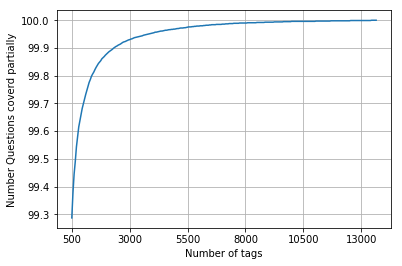

with  5500 tags we are covering  99.93 % of questions


In [69]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")

In [70]:
multilabel_yx = tags_to_choose(5500)
print("number of questions that are not covered :", questions_explained_fn(5500),"out of ", total_qs)

number of questions that are not covered : 2947 out of  4206314


In [71]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 26819
number of tags taken : 5500 ( 20.507848913084008 %)


__ We consider top 20% tags which covers  99.93% of the questions __

<h2>4.2 Split the data into test and train (80:20) </h2>

In [74]:
total_size=data.shape[0]
train_size=int(0.80*total_size)

x_train=data.head(train_size)
x_test=data.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [75]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (240000, 5500)
Number of data points in test data : (60000, 5500)


<h2>4.3 Featurizing data </h2>

In [90]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:09:50.460431


In [91]:
print("Diamensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Diamensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Diamensions of train data X: (799999, 88244) Y : (799999, 5500)
Diamensions of test data X: (200000, 88244) Y: (200000, 5500)


In [92]:
# https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/
#https://stats.stackexchange.com/questions/117796/scikit-multi-label-classification
# classifier = LabelPowerset(GaussianNB())
"""
from skmultilearn.adapt import MLkNN
classifier = MLkNN(k=21)

# train
classifier.fit(x_train_multilabel, y_train)

# predict
predictions = classifier.predict(x_test_multilabel)
print(accuracy_score(y_test,predictions))
print(metrics.f1_score(y_test, predictions, average = 'macro'))
print(metrics.f1_score(y_test, predictions, average = 'micro'))
print(metrics.hamming_loss(y_test,predictions))

"""
# we are getting memory error because the multilearn package is trying to conver the data into dense matrix
# ---------------------------------------------------------------------------
#MemoryError                               Traceback (most recent call last)
#<ipython-input-170-f0e7c7f3e0be> in <module>()
#----> classifier.fit(x_train_multilabel, y_train)

"\nfrom skmultilearn.adapt import MLkNN\nclassifier = MLkNN(k=21)\n\n# train\nclassifier.fit(x_train_multilabel, y_train)\n\n# predict\npredictions = classifier.predict(x_test_multilabel)\nprint(accuracy_score(y_test,predictions))\nprint(metrics.f1_score(y_test, predictions, average = 'macro'))\nprint(metrics.f1_score(y_test, predictions, average = 'micro'))\nprint(metrics.hamming_loss(y_test,predictions))\n\n"

<h2> 4.4 Applying Logistric Regression with OneVsRest Classifier </h2>

In [74]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))


accuracy : 0.081965
macro f1 score : 0.0963020140154
micro f1 scoore : 0.374270748817
hamming loss : 0.00041225090909090907
Precision recall report :
              precision    recall  f1-score   support

          0       0.62      0.23      0.33     15760
          1       0.79      0.43      0.56     14039
          2       0.82      0.55      0.66     13446
          3       0.76      0.42      0.54     12730
          4       0.94      0.76      0.84     11229
          5       0.85      0.64      0.73     10561
          6       0.70      0.30      0.42      6958
          7       0.87      0.61      0.72      6309
          8       0.70      0.40      0.50      6032
          9       0.78      0.43      0.55      6020
         10       0.86      0.62      0.72      5707
         11       0.52      0.17      0.25      5723
         12       0.55      0.10      0.16      5521
         13       0.59      0.25      0.35      4722
         14       0.61      0.22      0.32      4468


In [112]:
from sklearn.externals import joblib
joblib.dump(classifier, 'lr_with_equal_weight.pkl') 

<h2> 4.5 Modeling with less data points (0.5M data points) and more weight to title </h2>

In [94]:
sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Titlemoreweight.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [95]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table

read_db = 'train_no_dup.db'
write_db = 'Titlemoreweight.db'
train_datasize = 400000
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        # for selecting first 0.5M rows
        reader.execute("SELECT Title, Body, Tags From no_dup_train LIMIT 500001;")
        # for selecting random points
        #reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 500001;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")

Tables in the databse:
QuestionsProcessed
Cleared All the rows


<h3> 4.5.1 Preprocessing of questions </h3>

<ol> 
    <li> Separate Code from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> <b> Give more weightage to title : Add title three times to the question </b> </li>
    <li> <b> Add 'Tags' string to the training data </b> </li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [96]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:
    
    is_code = 0
    
    title, question, tags = row[0], row[1], str(row[2])
    
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
    
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))
    
    title=title.encode('utf-8')
    
    # adding title three time to the data to increase its weight
    # add tags string to the training data
    
    question=str(title)+" "+str(title)+" "+str(title)+" "+question
    
#     if questions_proccesed<=train_datasize:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question+" "+str(tags)
#     else:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question

    question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    words=word_tokenize(str(question.lower()))
    
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 100000
number of questions completed= 200000
number of questions completed= 300000
number of questions completed= 400000
number of questions completed= 500000
Avg. length of questions(Title+Body) before processing: 1239
Avg. length of questions(Title+Body) after processing: 424
Percent of questions containing code: 57
Time taken to run this cell : 0:23:12.329039


In [97]:
# never forget to close the conections or else we will end up with database locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

__ Sample quesitons after preprocessing of data __

In [98]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('dynam datagrid bind silverlight dynam datagrid bind silverlight dynam datagrid bind silverlight bind datagrid dynam code wrote code debug code block seem bind correct grid come column form come grid column although necessari bind nthank repli advance..',)
----------------------------------------------------------------------------------------------------
('java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid follow guid link instal jstl got follow error tri launch jsp page java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid taglib declar instal jstl 1.1 tomcat webapp tri project work also tri version 1.2 jstl still messag caus solv',)
----------------------------------------------------------------------------------------------------
('java.sql.sqlexcept microsoft odbc driver

__ Saving Preprocessed data to a Database __

In [99]:
#Taking 1 Million entries to a dataframe.
write_db = 'Titlemoreweight.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [100]:
preprocessed_data.head()

,question,tags
0,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding
1,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding columns
2,java.lang.noclassdeffounderror javax servlet j...,jsp jstl
3,java.sql.sqlexcept microsoft odbc driver manag...,java jdbc
4,better way updat feed fb php sdk better way up...,facebook api facebook-php-sdk


In [101]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 500000
number of dimensions : 2


__ Converting string Tags to multilable output variables __ 

In [76]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(data['Tags'].values.astype('U'))

__ Selecting 500 Tags __

In [77]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

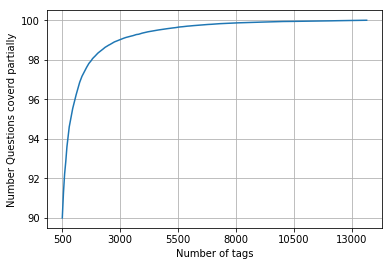

with  500 tags we are covering  89.999 % of questions


In [78]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
print("with ",500,"tags we are covering ",questions_explained[0],"% of questions")

In [79]:
multilabel_yx = tags_to_choose(500)
print("number of questions that are not covered :", questions_explained_fn(500),"out of ", total_qs)

number of questions that are not covered : 30004 out of  300000


In [83]:
train_datasize=200000
x_train=data.head(train_datasize)
x_test=data.tail(data.shape[0] - 200000)

y_train = multilabel_yx[0:train_datasize,:]
y_test = multilabel_yx[train_datasize:data.shape[0],:]

In [84]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (200000, 500)
Number of data points in test data : (100000, 500)


<h3> 4.5.2 Featurizing data with TfIdf vectorizer </h3>

In [108]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=20000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:03:52.522389


In [109]:
print("Diamensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Diamensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Diamensions of train data X: (400000, 94927) Y : (400000, 500)
Diamensions of test data X: (100000, 94927) Y: (100000, 500)


<h3> 4.5.3 Applying Logistric Regression with OneVsRest Classifier </h3>

In [110]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict (x_test_multilabel)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.23623
Hamming loss  0.00278088
Micro-average quality numbers
Precision: 0.7216, Recall: 0.3256, F1-measure: 0.4488
Macro-average quality numbers
Precision: 0.5473, Recall: 0.2572, F1-measure: 0.3339
             precision    recall  f1-score   support

          0       0.94      0.64      0.76      5519
          1       0.69      0.26      0.38      8190
          2       0.81      0.37      0.51      6529
          3       0.81      0.43      0.56      3231
          4       0.81      0.40      0.54      6430
          5       0.82      0.33      0.47      2879
          6       0.87      0.50      0.63      5086
          7       0.87      0.54      0.67      4533
          8       0.60      0.13      0.22      3000
          9       0.81      0.53      0.64      2765
         10       0.59      0.17      0.26      3051
         11       0.70      0.33      0.45      3009
         12       0.64      0.24      0.35      2630
         13       0.71      0.23      0.35   

In [113]:
joblib.dump(classifier, 'lr_with_more_title_weight.pkl') 

['lr_with_more_title_weight.pkl']

In [114]:
start = datetime.now()
classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1)
classifier_2.fit(x_train_multilabel, y_train)
predictions_2 = classifier_2.predict(x_test_multilabel)
print("Accuracy :",metrics.accuracy_score(y_test, predictions_2))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions_2))


precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_2))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.25108
Hamming loss  0.00270302
Micro-average quality numbers
Precision: 0.7172, Recall: 0.3672, F1-measure: 0.4858
Macro-average quality numbers
Precision: 0.5570, Recall: 0.2950, F1-measure: 0.3710
             precision    recall  f1-score   support

          0       0.94      0.72      0.82      5519
          1       0.70      0.34      0.45      8190
          2       0.80      0.42      0.55      6529
          3       0.82      0.49      0.61      3231
          4       0.80      0.44      0.57      6430
          5       0.82      0.38      0.52      2879
          6       0.86      0.53      0.66      5086
          7       0.87      0.58      0.70      4533
          8       0.60      0.13      0.22      3000
          9       0.82      0.57      0.67      2765
         10       0.60      0.20      0.30      3051
         11       0.68      0.38      0.49      3009
         12       0.62      0.29      0.40      2630
         13       0.73      0.30      0.43   

<h1> 5. Approaches Used </h1>

<ol>
    <li> Used bag of words upto 4 grams and compute the micro f1 score with Logistric regression(One vs Rest Classifier) </li>
    <li> Used tdidf vectorizer upto 4 grams and compute the micro f1 score with SVM (One vs Rest Classifier) </li>
    <li> Added some extra features and tried to get micro f1 score > 0.5 </li>
</ol>

<b><h1>Data Preparation</h1></b>

In [146]:
final_data=final_data.sort_values(by=['Tag_Count'],ascending='False')
final_data.head()

,Id,Title,Body,Tags,Tag_Count
4214856,4214857,How do I create this text delimiter?,<p>I want to create a delimiter between two re...,formatting,1
2229898,2229899,getting parameter is not valid : Trying to ret...,<p>i have spent 2 months trying to insert an i...,c#,1
3897983,3897984,fedora /usr/share/dict/words file,<p>is there a way I can install <code>/usr/sha...,fedora,1
3897980,3897981,how to disable all listbox in a form,<p>how to disable all listbox in a form</p>\n,javascript,1
3897969,3897970,silverlight putting item to listbox and view o...,<p>We are working on a project with my friends...,silverlight,1


In [85]:
#Function to get the URL count
def get_url_count(df):
    url_count=[]
    for sentence in data['Question'].values:
        count=0
        if 'http' in sentence.split():
            count=count+sentence.split().count('http')
        url_count.append(count)
    return url_count

In [86]:
data['URL_Count']=get_url_count(data)

In [88]:
data['Tags_Count']=get_tag_count(data)
data.head(2)

,Question,Code,Tags,Length_title,Length,Is_Code,Word_Count,href_Count,Total_HTMLTags,Total_CodeSegments,URL_Count,Tags_Count
0,activeadmin creat new associ belong form examp...,['class Post &lt; ActiveRecord::Base\n belong...,ruby-on-rails associations activeadmin belongs-to,731,397,1,65,0,0,0,0,4
1,cancel task without provid task method cancell...,[' CancellationTokenSource cancellationT...,c# multithreading parallel-processing,2346,707,1,161,0,0,0,0,3


In [89]:
#Preparing train and test data
train_datasize=200000
x_train=data.head(train_datasize)
x_test=data.tail(data.shape[0] - 200000)

y_train = multilabel_yx[0:train_datasize,:]
y_test = multilabel_yx[train_datasize:data.shape[0],:]

In [90]:
x_train.head(2)

,Question,Code,Tags,Length_title,Length,Is_Code,Word_Count,href_Count,Total_HTMLTags,Total_CodeSegments,URL_Count,Tags_Count
0,activeadmin creat new associ belong form examp...,['class Post &lt; ActiveRecord::Base\n belong...,ruby-on-rails associations activeadmin belongs-to,731,397,1,65,0,0,0,0,4
1,cancel task without provid task method cancell...,[' CancellationTokenSource cancellationT...,c# multithreading parallel-processing,2346,707,1,161,0,0,0,0,3


<h1><b>Performing Standardizations on Numerical Features and Text Featurization </b></h1>

In [91]:
#Column Standardizatio# Column Standardization on Length_Text
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train['Length_title'].values.reshape(-1,1))

x_train_len_title_stand=scaler.transform(x_train['Length_title'].values.reshape(-1,1))
#x_cv_price_stand=scaler.transform(x_cv['Length_Text'].values.reshape(-1,1))
x_test_len_title_stand=scaler.transform(x_test['Length_title'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_len_title_stand.shape, y_train.shape)
#print(x_cv_price_stand.shape, y_cv.shape)
print(x_test_len_title_stand.shape, y_test.shape)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(200000, 1) (200000, 500)
(100000, 1) (100000, 500)


In [92]:
#Column Standardizatio# Column Standardization on Length_Text
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train['href_Count'].values.reshape(-1,1))

x_train_href_count_stand=scaler.transform(x_train['href_Count'].values.reshape(-1,1))
#x_cv_price_stand=scaler.transform(x_cv['Length_Text'].values.reshape(-1,1))
x_test_href_count_stand=scaler.transform(x_test['href_Count'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_href_count_stand.shape, y_train.shape)
#print(x_cv_price_stand.shape, y_cv.shape)
print(x_test_href_count_stand.shape, y_test.shape)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(200000, 1) (200000, 500)
(100000, 1) (100000, 500)


In [93]:
#Column Standardizatio# Column Standardization on Length_Text
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train['Word_Count'].values.reshape(-1,1))

x_train_word_count_stand=scaler.transform(x_train['Word_Count'].values.reshape(-1,1))
#x_cv_price_stand=scaler.transform(x_cv['Length_Text'].values.reshape(-1,1))
x_test_word_count_stand=scaler.transform(x_test['Word_Count'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_word_count_stand.shape, y_train.shape)
#print(x_cv_price_stand.shape, y_cv.shape)
print(x_test_word_count_stand.shape, y_test.shape)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(200000, 1) (200000, 500)
(100000, 1) (100000, 500)


In [94]:
#Column Standardizatio# Column Standardization on Length_Text
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train['Total_HTMLTags'].values.reshape(-1,1))

x_train_len_html_stand=scaler.transform(x_train['Total_HTMLTags'].values.reshape(-1,1))
#x_cv_price_stand=scaler.transform(x_cv['Length_Text'].values.reshape(-1,1))
x_test_len_html_stand=scaler.transform(x_test['Total_HTMLTags'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_len_html_stand.shape, y_train.shape)
#print(x_cv_price_stand.shape, y_cv.shape)
print(x_test_len_html_stand.shape, y_test.shape)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(200000, 1) (200000, 500)
(100000, 1) (100000, 500)


In [95]:
#Column Standardizatio# Column Standardization on Length_Text
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train['Total_CodeSegments'].values.reshape(-1,1))

x_train_len_code_stand=scaler.transform(x_train['Total_CodeSegments'].values.reshape(-1,1))
#x_cv_price_stand=scaler.transform(x_cv['Length_Text'].values.reshape(-1,1))
x_test_len_code_stand=scaler.transform(x_test['Total_CodeSegments'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_len_code_stand.shape, y_train.shape)
#print(x_cv_price_stand.shape, y_cv.shape)
print(x_test_len_code_stand.shape, y_test.shape)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(200000, 1) (200000, 500)
(100000, 1) (100000, 500)


In [96]:
#Column Standardizatio# Column Standardization on Length_Text
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train['Length'].values.reshape(-1,1))

x_train_len_stand=scaler.transform(x_train['Length'].values.reshape(-1,1))
#x_cv_price_stand=scaler.transform(x_cv['Length_Text'].values.reshape(-1,1))
x_test_len_stand=scaler.transform(x_test['Length'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_len_stand.shape, y_train.shape)
#print(x_cv_price_stand.shape, y_cv.shape)
print(x_test_len_stand.shape, y_test.shape)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(200000, 1) (200000, 500)
(100000, 1) (100000, 500)


In [97]:
#Column Standardizatio# Column Standardization on Length_Text
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train['Length_title'].values.reshape(-1,1))

x_train_len_title_stand=scaler.transform(x_train['Length_title'].values.reshape(-1,1))
#x_cv_price_stand=scaler.transform(x_cv['Length_Text'].values.reshape(-1,1))
x_test_len_title_stand=scaler.transform(x_test['Length_title'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_len_title_stand.shape, y_train.shape)
#print(x_cv_price_stand.shape, y_cv.shape)
print(x_test_len_title_stand.shape, y_test.shape)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(200000, 1) (200000, 500)
(100000, 1) (100000, 500)


In [98]:
# Column Standardization on Price
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train['Tags_Count'].values.reshape(-1,1))

x_train_tag_count_stand=scaler.transform(x_train['Tags_Count'].values.reshape(-1,1))
#x_cv_price_stand=scaler.transform(x_cv['Tag_Count'].values.reshape(-1,1))
x_test_tag_count_stand=scaler.transform(x_test['Tags_Count'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_tag_count_stand.shape, y_train.shape)
#print(x_cv_price_stand.shape, y_cv.shape)
print(x_test_tag_count_stand.shape, y_test.shape)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(200000, 1) (200000, 500)
(100000, 1) (100000, 500)


In [99]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0.00009,ngram_range=(1,4),max_features=20000,tokenizer=lambda x:x.split())
vectorizer.fit(x_train['Question'].values)

x_train_question_bow = vectorizer.transform(x_train['Question'].values)
#x_cv_essay_bow = vectorizer.transform(x_cv['essay'].values)
x_test_question_bow = vectorizer.transform(x_test['Question'].values)

print("After vectorizations")
print(x_train_question_bow.shape, y_train.shape)
#print(x_cv_essay_bow.shape, y_cv.shape)
print(x_test_question_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(200000, 20000) (200000, 500)
(100000, 20000) (100000, 500)


In [100]:
#Dumping model with the help of joblib
from joblib import dump,load
dump(x_train_question_bow,'question_bagofwords_train.joblib')

['question_bagofwords_train.joblib']

In [101]:
#Dumping model with the help of joblib
from joblib import dump,load
dump(x_test_question_bow,'question_bagofwords_test.joblib')

['question_bagofwords_test.joblib']

In [102]:
#Column Standardizatio# Column Standardization on Length_Text
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train['URL_Count'].values.reshape(-1,1))

x_train_urlcount_stand=scaler.transform(x_train['URL_Count'].values.reshape(-1,1))
#x_cv_price_stand=scaler.transform(x_cv['Length_Text'].values.reshape(-1,1))
x_test_urlcount_stand=scaler.transform(x_test['URL_Count'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_urlcount_stand.shape, y_train.shape)
#print(x_cv_price_stand.shape, y_cv.shape)
print(x_test_urlcount_stand.shape, y_test.shape)

C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(200000, 1) (200000, 500)
(100000, 1) (100000, 500)


<b>Preparing Data Models</b>

In [103]:
#Preparing Data Models after performing some basic Feature Engineering
from scipy.sparse import hstack

x_train_bow=hstack((x_train_len_html_stand,x_train_len_code_stand,x_train_word_count_stand,x_train_href_count_stand,x_train_urlcount_stand,x_train_question_bow,x_train_tag_count_stand,x_train_len_stand,x_train_len_title_stand)).tocsr()
x_test_bow=hstack((x_test_len_html_stand,x_test_len_code_stand,x_test_word_count_stand,x_test_href_count_stand,x_test_urlcount_stand,x_test_question_bow,x_test_tag_count_stand,x_test_len_stand,x_test_len_title_stand)).tocsr()

print(x_train_bow.shape)
print(x_test_bow.shape)

(200000, 20008)
(100000, 20008)


<b>HyperParameter Tuning using GridSearch for alpha Parameter</b>

In [104]:
#Hyperparameter tuning on alpha using GridSearchCV for LR
from sklearn.model_selection import GridSearchCV

parameters={'estimator__alpha':[10** i for i in range(-5,3)]}
lr=OneVsRestClassifier(SGDClassifier(loss='log',random_state=42),n_jobs=-1)
clf_log=GridSearchCV(lr,param_grid=parameters,scoring='f1_micro',cv=3,return_train_score='True',verbose=10)
clf_log.fit(x_train_bow,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] estimator__alpha=1e-05 ..........................................
[CV]  estimator__alpha=1e-05, score=0.42142812441329247, total=32.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 32.5min remaining:    0.0s


[CV] estimator__alpha=1e-05 ..........................................
[CV] . estimator__alpha=1e-05, score=0.4386059025147317, total=11.9min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 44.7min remaining:    0.0s


[CV] estimator__alpha=1e-05 ..........................................
[CV] . estimator__alpha=1e-05, score=0.4230237250945281, total= 2.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 47.5min remaining:    0.0s


[CV] estimator__alpha=0.0001 .........................................
[CV]  estimator__alpha=0.0001, score=0.4972079538800634, total= 2.5min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 50.2min remaining:    0.0s


[CV] estimator__alpha=0.0001 .........................................
[CV]  estimator__alpha=0.0001, score=0.4918758266239546, total= 2.5min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 53.0min remaining:    0.0s


[CV] estimator__alpha=0.0001 .........................................
[CV]  estimator__alpha=0.0001, score=0.49446398332682034, total= 2.5min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 55.7min remaining:    0.0s


[CV] estimator__alpha=0.001 ..........................................
[CV] . estimator__alpha=0.001, score=0.4794411217974622, total= 2.5min


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 58.4min remaining:    0.0s


[CV] estimator__alpha=0.001 ..........................................
[CV] . estimator__alpha=0.001, score=0.4439400349910235, total= 2.5min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 61.2min remaining:    0.0s


[CV] estimator__alpha=0.001 ..........................................
[CV] . estimator__alpha=0.001, score=0.4811684977923811, total= 2.5min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 63.9min remaining:    0.0s


[CV] estimator__alpha=0.01 ...........................................
[CV] . estimator__alpha=0.01, score=0.36392060425083433, total= 2.5min
[CV] estimator__alpha=0.01 ...........................................
[CV] .. estimator__alpha=0.01, score=0.2944124130352757, total= 2.5min
[CV] estimator__alpha=0.01 ...........................................
[CV] .. estimator__alpha=0.01, score=0.3627599844627282, total= 2.5min
[CV] estimator__alpha=0.1 ............................................
[CV] .. estimator__alpha=0.1, score=0.16344520261801976, total= 2.5min
[CV] estimator__alpha=0.1 ............................................
[CV] .. estimator__alpha=0.1, score=0.10940152881430112, total= 2.5min
[CV] estimator__alpha=0.1 ............................................
[CV] ... estimator__alpha=0.1, score=0.1626162149942069, total= 2.5min
[CV] estimator__alpha=1 ..............................................
[CV] .... estimator__alpha=1, score=0.01547917473634975, total= 2.5min
[CV] e

C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  estimator__alpha=100, score=0.0012878482320391167, total= 3.5min
[CV] estimator__alpha=100 ............................................


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .................. estimator__alpha=100, score=0.0, total= 3.2min
[CV] estimator__alpha=100 ............................................
[CV]  estimator__alpha=100, score=0.0013551461675713522, total= 3.5min


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 110.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=-1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='True',
       scoring='f1_micro', verbose=10)

In [108]:
best_alpha_lr=clf_log.best_estimator_.get_params()['estimator__alpha']
print(best_alpha_lr)

0.0001


<b>Applying Logistic Regression using L2 regularization </b>

In [109]:
start = datetime.now()
best_alpha=best_alpha_lr
classifier = OneVsRestClassifier(SGDClassifier(loss='log',alpha=best_alpha_lr, penalty='l2'), n_jobs=-1)
classifier.fit(x_train_bow, y_train)
predictions = classifier.predict (x_test_bow)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.23023
Hamming loss  0.00296932
Micro-average quality numbers
Precision: 0.6439, Recall: 0.3969, F1-measure: 0.4911
Macro-average quality numbers
Precision: 0.4999, Recall: 0.3121, F1-measure: 0.3748
             precision    recall  f1-score   support

          0       0.56      0.37      0.45      7889
          1       0.79      0.38      0.51      7166
          2       0.81      0.53      0.64      6649
          3       0.69      0.51      0.59      6358
          4       0.92      0.78      0.84      5637
          5       0.81      0.72      0.76      5290
          6       0.72      0.33      0.45      3422
          7       0.88      0.63      0.74      3165
          8       0.68      0.49      0.57      3082
          9       0.82      0.39      0.53      3003
         10       0.76      0.68      0.72      2947
         11       0.47      0.36      0.41      2883
         12       0.52      0.17      0.26      2685
         13       0.59      0.33      0.43   


Time taken to run this cell : 0:05:18.719976


<b>Implementing SGD Classifier with log loss after Balancing the classes </b>

In [68]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log',alpha=0.0001, penalty='l1',class_weight='balanced'), n_jobs=-1)
classifier.fit(x_train_bow, y_train)
predictions = classifier.predict (x_test_bow)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.0
Hamming loss  0.11133450666666667
Micro-average quality numbers
Precision: 0.0269, Recall: 0.8476, F1-measure: 0.0521
Macro-average quality numbers
Precision: 0.0280, Recall: 0.8556, F1-measure: 0.0503
             precision    recall  f1-score   support

          0       0.23      0.73      0.35      5857
          1       0.30      0.82      0.44      5424
          2       0.36      0.86      0.50      5176
          3       0.32      0.83      0.46      4819
          4       0.46      0.92      0.61      4213
          5       0.35      0.90      0.51      3878
          6       0.16      0.79      0.27      2652
          7       0.24      0.86      0.38      2391
          8       0.24      0.86      0.38      2289
          9       0.15      0.82      0.26      2199
         10       0.27      0.89      0.42      2232
         11       0.15      0.82      0.26      2175
         12       0.10      0.74      0.18      2070
         13       0.17      0.85      0.


Time taken to run this cell : 0:04:00.745814


<b>Using GridSearchCV for Hyperparameter Tuning for SVM Classifier</b>

In [110]:
#Hyperparameter tuning on alpha using GridSearchCV for SVM
from sklearn.model_selection import GridSearchCV

parameters={'estimator__alpha':[10** i for i in range(-5,3)]}
svm=OneVsRestClassifier(SGDClassifier(loss='hinge',random_state=42),n_jobs=-1)
clf_svm=GridSearchCV(svm,param_grid=parameters,scoring='f1_micro',cv=3,return_train_score='True',verbose=10)
clf_svm.fit(x_train_bow,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] estimator__alpha=1e-05 ..........................................
[CV]  estimator__alpha=1e-05, score=0.42710057578229577, total= 3.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s


[CV] estimator__alpha=1e-05 ..........................................
[CV] . estimator__alpha=1e-05, score=0.4414387521284871, total= 2.9min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.6min remaining:    0.0s


[CV] estimator__alpha=1e-05 ..........................................
[CV]  estimator__alpha=1e-05, score=0.42217256899396155, total= 3.1min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.0min remaining:    0.0s


[CV] estimator__alpha=0.0001 .........................................
[CV]  estimator__alpha=0.0001, score=0.47989184612653457, total= 2.9min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 13.3min remaining:    0.0s


[CV] estimator__alpha=0.0001 .........................................
[CV]  estimator__alpha=0.0001, score=0.4835220814014367, total= 3.1min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 16.7min remaining:    0.0s


[CV] estimator__alpha=0.0001 .........................................
[CV]  estimator__alpha=0.0001, score=0.4777790727488869, total= 3.0min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 20.0min remaining:    0.0s


[CV] estimator__alpha=0.001 ..........................................
[CV]  estimator__alpha=0.001, score=0.49038277780900463, total= 2.8min


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 23.2min remaining:    0.0s


[CV] estimator__alpha=0.001 ..........................................
[CV] .. estimator__alpha=0.001, score=0.481003530899664, total= 2.8min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 26.3min remaining:    0.0s


[CV] estimator__alpha=0.001 ..........................................
[CV] . estimator__alpha=0.001, score=0.4871652669941373, total= 2.9min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 29.5min remaining:    0.0s


[CV] estimator__alpha=0.01 ...........................................
[CV] .. estimator__alpha=0.01, score=0.3848707847072524, total= 2.9min
[CV] estimator__alpha=0.01 ...........................................
[CV] .. estimator__alpha=0.01, score=0.3715709295000286, total= 3.0min
[CV] estimator__alpha=0.01 ...........................................
[CV] . estimator__alpha=0.01, score=0.39087020342335876, total= 2.9min
[CV] estimator__alpha=0.1 ............................................
[CV] .. estimator__alpha=0.1, score=0.21371240019213233, total= 2.9min
[CV] estimator__alpha=0.1 ............................................
[CV] ... estimator__alpha=0.1, score=0.1929904805465824, total= 2.8min
[CV] estimator__alpha=0.1 ............................................
[CV] ... estimator__alpha=0.1, score=0.2155812357141341, total= 2.9min
[CV] estimator__alpha=1 ..............................................
[CV] ... estimator__alpha=1, score=0.023751112654957555, total= 2.9min
[CV] e

C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  estimator__alpha=100, score=0.0013219782360635662, total= 3.3min
[CV] estimator__alpha=100 ............................................


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .................. estimator__alpha=100, score=0.0, total= 3.4min
[CV] estimator__alpha=100 ............................................
[CV]  estimator__alpha=100, score=0.0014443658563823847, total= 3.0min


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 80.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=-1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='True',
       scoring='f1_micro', verbose=10)

In [112]:
best_alpha_svm=clf_svm.best_estimator_.get_params()['estimator__alpha']
print(best_alpha_svm)

0.001


<h3>Applying SVM after finding the best possible value of alpha for L2 Regularization(BOW Representation for Question)</h3>

In [113]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',alpha=best_alpha_svm, penalty='l2'), n_jobs=-1)
classifier.fit(x_train_bow, y_train)
predictions = classifier.predict (x_test_bow)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.24715
Hamming loss  0.00273116
Micro-average quality numbers
Precision: 0.7831, Recall: 0.3366, F1-measure: 0.4709
Macro-average quality numbers
Precision: 0.4749, Recall: 0.2452, F1-measure: 0.2983
             precision    recall  f1-score   support

          0       0.68      0.20      0.31      7889
          1       0.84      0.43      0.57      7166
          2       0.86      0.55      0.67      6649
          3       0.81      0.43      0.56      6358
          4       0.95      0.75      0.84      5637
          5       0.90      0.64      0.75      5290
          6       0.81      0.28      0.42      3422
          7       0.91      0.61      0.73      3165
          8       0.79      0.39      0.52      3082
          9       0.84      0.41      0.55      3003
         10       0.89      0.61      0.72      2947
         11       0.62      0.16      0.25      2883
         12       0.69      0.07      0.13      2685
         13       0.68      0.30      0.42   


Time taken to run this cell : 0:03:50.745166


In [115]:
#Using joblib to store GridSearch Variables and Models
from joblib import dump,load
dump(clf_svm,'gridsearch_svm.joblib')
dump(clf_log,'gridsearch_lr.joblib')

['gridsearch_lr.joblib']

<h3>SVM for L1 Regularization on Simple BOW encoding Questions </h3>

In [137]:
best_alpha=0.0001
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',alpha=best_alpha, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_bow, y_train)
predictions = classifier.predict (x_test_bow)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.16448
Hamming loss  0.00437718
Micro-average quality numbers
Precision: 0.4036, Recall: 0.4450, F1-measure: 0.4233
Macro-average quality numbers
Precision: 0.2950, Recall: 0.3524, F1-measure: 0.3172
             precision    recall  f1-score   support

          0       0.43      0.42      0.42      7889
          1       0.55      0.56      0.56      7166
          2       0.64      0.62      0.63      6649
          3       0.53      0.56      0.54      6358
          4       0.82      0.80      0.81      5637
          5       0.70      0.70      0.70      5290
          6       0.45      0.46      0.46      3422
          7       0.70      0.69      0.70      3165
          8       0.55      0.53      0.54      3082
          9       0.52      0.54      0.53      3003
         10       0.70      0.65      0.67      2947
         11       0.25      0.31      0.27      2883
         12       0.27      0.23      0.25      2685
         13       0.41      0.42      0.42   


Time taken to run this cell : 0:06:18.209534


<h3>Applying Logistic Regression for L1 regularization </h3>

In [117]:
#Trying Logistic Regression with L1 regularizer

start = datetime.now()
best_alpha=best_alpha_lr
classifier = OneVsRestClassifier(SGDClassifier(loss='log',alpha=best_alpha_lr, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_bow, y_train)
predictions = classifier.predict (x_test_bow)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.16232
Hamming loss  0.00442994
Micro-average quality numbers
Precision: 0.3989, Recall: 0.4483, F1-measure: 0.4222
Macro-average quality numbers
Precision: 0.2882, Recall: 0.3559, F1-measure: 0.3153
             precision    recall  f1-score   support

          0       0.43      0.43      0.43      7889
          1       0.57      0.56      0.56      7166
          2       0.69      0.62      0.65      6649
          3       0.56      0.53      0.54      6358
          4       0.83      0.81      0.82      5637
          5       0.69      0.71      0.70      5290
          6       0.45      0.47      0.46      3422
          7       0.71      0.70      0.71      3165
          8       0.56      0.53      0.54      3082
          9       0.51      0.52      0.52      3003
         10       0.70      0.67      0.68      2947
         11       0.32      0.35      0.34      2883
         12       0.25      0.25      0.25      2685
         13       0.42      0.41      0.41   


Time taken to run this cell : 0:07:58.712058


<h3>Tfidf Encoding for Question </h3>

In [118]:
#Applying TFIDF Vectorizer

start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009,max_features=20000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,4))
x_train_tfidf = vectorizer.fit_transform(x_train['Question'])
x_test_tfidf = vectorizer.transform(x_test['Question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:05:28.568194


<h3>Preparing Data Models</h3>

In [119]:
#Data Models after applying some basic Feature Engineering
from scipy.sparse import hstack

x_train_final_tfidf=hstack((x_train_len_html_stand,x_train_len_code_stand,x_train_word_count_stand,x_train_href_count_stand,x_train_urlcount_stand,x_train_tfidf,x_train_tag_count_stand,x_train_len_stand,x_train_len_title_stand)).tocsr()
x_test_final_tfidf=hstack((x_test_len_html_stand,x_test_len_code_stand,x_test_word_count_stand,x_test_href_count_stand,x_test_urlcount_stand,x_test_tfidf,x_test_tag_count_stand,x_test_len_stand,x_test_len_title_stand)).tocsr()

print(x_train_final_tfidf.shape)
print(x_test_final_tfidf.shape)

(200000, 20008)
(100000, 20008)


<h3>Applying GridSearchCV for SVM</h3>

In [120]:
#Hyperparameter tuning on alpha using GridSearchCV for SVM
from sklearn.model_selection import GridSearchCV

parameters={'estimator__alpha':[10** i for i in range(-5,3)]}
svm=OneVsRestClassifier(SGDClassifier(loss='hinge',random_state=42),n_jobs=-1)
clf_svm=GridSearchCV(svm,param_grid=parameters,scoring='f1_micro',cv=3,return_train_score='True',verbose=10)
clf_svm.fit(x_train_final_tfidf,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] estimator__alpha=1e-05 ..........................................
[CV] . estimator__alpha=1e-05, score=0.2593509255063269, total= 2.6min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min remaining:    0.0s


[CV] estimator__alpha=1e-05 ..........................................
[CV]  estimator__alpha=1e-05, score=0.39690180649776313, total= 2.5min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.7min remaining:    0.0s


[CV] estimator__alpha=1e-05 ..........................................
[CV]  estimator__alpha=1e-05, score=0.29201023599658804, total= 2.4min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.4min remaining:    0.0s


[CV] estimator__alpha=0.0001 .........................................
[CV]  estimator__alpha=0.0001, score=0.1773182863239515, total= 2.4min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 11.1min remaining:    0.0s


[CV] estimator__alpha=0.0001 .........................................
[CV]  estimator__alpha=0.0001, score=0.2619717133470683, total= 2.5min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 13.8min remaining:    0.0s


[CV] estimator__alpha=0.0001 .........................................
[CV]  estimator__alpha=0.0001, score=0.18985340829443606, total= 2.4min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 16.5min remaining:    0.0s


[CV] estimator__alpha=0.001 ..........................................
[CV]  estimator__alpha=0.001, score=0.08079745655343867, total= 2.3min


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 19.1min remaining:    0.0s


[CV] estimator__alpha=0.001 ..........................................
[CV]  estimator__alpha=0.001, score=0.09012607861558258, total= 2.3min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 21.6min remaining:    0.0s


[CV] estimator__alpha=0.001 ..........................................
[CV] . estimator__alpha=0.001, score=0.0858788341606211, total= 2.3min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 24.2min remaining:    0.0s


[CV] estimator__alpha=0.01 ...........................................
[CV] ................. estimator__alpha=0.01, score=0.0, total= 2.3min
[CV] estimator__alpha=0.01 ...........................................
[CV] ................. estimator__alpha=0.01, score=0.0, total= 2.4min
[CV] estimator__alpha=0.01 ...........................................
[CV] ................. estimator__alpha=0.01, score=0.0, total= 2.4min
[CV] estimator__alpha=0.1 ............................................
[CV] .. estimator__alpha=0.1, score=0.02557863165638617, total= 2.6min
[CV] estimator__alpha=0.1 ............................................
[CV]  estimator__alpha=0.1, score=0.0006299108178894672, total= 2.4min
[CV] estimator__alpha=0.1 ............................................
[CV] . estimator__alpha=0.1, score=0.025429804461813123, total= 2.4min
[CV] estimator__alpha=1 ..............................................
[CV] ... estimator__alpha=1, score=0.007178188203368567, total= 2.7min
[CV] e

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 72.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=-1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='True',
       scoring='f1_micro', verbose=10)

In [122]:
best_alpha_svm_tfidf=clf_svm.best_estimator_.get_params()['estimator__alpha']
print(best_alpha_svm_tfidf)

1e-05


In [124]:
#best_alpha=
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',alpha=best_alpha_svm_tfidf, penalty='l2'), n_jobs=-1)
classifier.fit(x_train_final_tfidf, y_train)
predictions = classifier.predict (x_test_final_tfidf)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.17011
Hamming loss  0.00371548
Micro-average quality numbers
Precision: 0.4762, Recall: 0.2933, F1-measure: 0.3630


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Macro-average quality numbers
Precision: 0.4768, Recall: 0.1384, F1-measure: 0.1908


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.75      0.12      0.21      7889
          1       0.78      0.47      0.58      7166
          2       0.78      0.64      0.70      6649
          3       0.72      0.48      0.58      6358
          4       0.91      0.78      0.84      5637
          5       0.65      0.79      0.71      5290
          6       0.56      0.45      0.50      3422
          7       0.93      0.54      0.68      3165
          8       0.69      0.47      0.56      3082
          9       0.61      0.50      0.55      3003
         10       0.87      0.55      0.67      2947
         11       0.50      0.33      0.40      2883
         12       0.59      0.15      0.24      2685
         13       0.62      0.28      0.38      2366
         14       0.52      0.38      0.44      2284
         15       0.66      0.25      0.36      2263
         16       0.76      0.55      0.63      2233
         17       0.80      0.46      0.58   


Time taken to run this cell : 0:03:36.807822


<h3>Training SVM with L1 Regularization</h3>

In [125]:
#Applying GridSearchCV with L1 regularizer

#Hyperparameter tuning on alpha using GridSearchCV for SVM
from sklearn.model_selection import GridSearchCV

parameters={'estimator__alpha':[10** i for i in range(-5,1)]}
svm=OneVsRestClassifier(SGDClassifier(loss='hinge',random_state=42,penalty='l1'),n_jobs=-1)
clf_svm=GridSearchCV(svm,param_grid=parameters,scoring='f1_micro',cv=3,return_train_score='True',verbose=10)
clf_svm.fit(x_train_final_tfidf,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] estimator__alpha=1e-05 ..........................................
[CV] .. estimator__alpha=1e-05, score=0.474557569524789, total= 3.9min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.2min remaining:    0.0s


[CV] estimator__alpha=1e-05 ..........................................
[CV] . estimator__alpha=1e-05, score=0.5019593645885823, total= 3.9min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.4min remaining:    0.0s


[CV] estimator__alpha=1e-05 ..........................................
[CV]  estimator__alpha=1e-05, score=0.45932856794090765, total= 3.5min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 12.1min remaining:    0.0s


[CV] estimator__alpha=0.0001 .........................................
[CV]  estimator__alpha=0.0001, score=0.43010423233971856, total= 3.2min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 15.6min remaining:    0.0s


[CV] estimator__alpha=0.0001 .........................................
[CV]  estimator__alpha=0.0001, score=0.42663008580935147, total= 3.2min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 19.1min remaining:    0.0s


[CV] estimator__alpha=0.0001 .........................................
[CV]  estimator__alpha=0.0001, score=0.3447800574961604, total= 3.2min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 22.5min remaining:    0.0s


[CV] estimator__alpha=0.001 ..........................................
[CV] . estimator__alpha=0.001, score=0.2181749082776665, total= 2.7min


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 25.5min remaining:    0.0s


[CV] estimator__alpha=0.001 ..........................................
[CV]  estimator__alpha=0.001, score=0.21945339955272866, total= 2.7min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 28.5min remaining:    0.0s


[CV] estimator__alpha=0.001 ..........................................
[CV]  estimator__alpha=0.001, score=0.19317472118959106, total= 2.7min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 31.4min remaining:    0.0s


[CV] estimator__alpha=0.01 ...........................................


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................. estimator__alpha=0.01, score=0.0, total= 2.6min
[CV] estimator__alpha=0.01 ...........................................


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................. estimator__alpha=0.01, score=0.0, total= 2.7min
[CV] estimator__alpha=0.01 ...........................................


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................. estimator__alpha=0.01, score=0.0, total= 3.1min
[CV] estimator__alpha=0.1 ............................................


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] . estimator__alpha=0.1, score=0.010760018970832345, total= 3.2min
[CV] estimator__alpha=0.1 ............................................


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .................. estimator__alpha=0.1, score=0.0, total= 2.9min
[CV] estimator__alpha=0.1 ............................................


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .................. estimator__alpha=0.1, score=0.0, total= 3.2min
[CV] estimator__alpha=1 ..............................................


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .................... estimator__alpha=1, score=0.0, total= 3.5min
[CV] estimator__alpha=1 ..............................................


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .................... estimator__alpha=1, score=0.0, total= 3.5min
[CV] estimator__alpha=1 ..............................................


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .................... estimator__alpha=1, score=0.0, total= 3.5min


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 61.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=-1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='True',
       scoring='f1_micro', verbose=10)

In [126]:
best_alpha_svm_tfidf=clf_svm.best_estimator_.get_params()['estimator__alpha']
print(best_alpha_svm_tfidf)

1e-05


In [127]:
#best_alpha=
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',alpha=best_alpha_svm_tfidf, penalty='l2'), n_jobs=-1)
classifier.fit(x_train_final_tfidf, y_train)
predictions = classifier.predict (x_test_final_tfidf)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.14235
Hamming loss  0.00416718
Micro-average quality numbers
Precision: 0.4015, Recall: 0.3146, F1-measure: 0.3528


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Macro-average quality numbers
Precision: 0.4895, Recall: 0.1452, F1-measure: 0.1983


C:\Users\om\Anaconda31\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.55      0.46      0.50      7889
          1       0.81      0.39      0.53      7166
          2       0.70      0.68      0.69      6649
          3       0.80      0.43      0.55      6358
          4       0.93      0.73      0.81      5637
          5       0.86      0.66      0.75      5290
          6       0.63      0.45      0.52      3422
          7       0.90      0.59      0.71      3165
          8       0.64      0.54      0.59      3082
          9       0.65      0.51      0.57      3003
         10       0.71      0.68      0.69      2947
         11       0.46      0.33      0.38      2883
         12       0.55      0.10      0.16      2685
         13       0.48      0.46      0.47      2366
         14       0.51      0.32      0.39      2284
         15       0.67      0.24      0.35      2263
         16       0.59      0.70      0.64      2233
         17       0.75      0.62      0.68   


Time taken to run this cell : 0:03:25.222561


In [140]:
from joblib import dump,load
dump(x_train_final_tfidf,'data_model_train_tfidf.joblib')
dump(x_test_final_tfidf,'data_model_test_tfidf.joblib')

['data_model_test_tfidf.joblib']

<b>Observations and Conclusions</b>

1.I have tried various Feature Engineering techniques like Number of CodeSegments,Number of URl's,Number of HTML tags,Number of words,Length of raw text etc.After performing various Feature Engineering techniques performance of the model has improved.As I have taken only 200k points for training,The model's performance has not improved much.I was not able to take more points due to memory issues.I think the performance would be  improved by taking atleast 500k points or so. <br>

2.I have tried various models with differnet type of regularization and tried with balancing and without balancing the class labels.

In [139]:
#Conclusion or Summary of the approaches Used 
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Vectorizer", "Alpha", "Regularizer","Micro_f1_Score"]

x.add_row(["SVM", "TFIDF", 0.00001, "L1",0.3528])
x.add_row(["SVM", "TFIDF", 0.00001, "L1",0.360])
x.add_row(["Logistic Regression", "BOW", 0.0001, "L2",0.4911])
x.add_row(["Logistic Regression", "BOW", 0.0001, "L1",0.4222])
x.add_row(["SVM", "BOW", 0.001, "L2",0.4709])
x.add_row(["SVM", "BOW", 0.0001, "L1",0.4233])

print(x)

+---------------------+------------+--------+-------------+----------------+
|        Model        | Vectorizer | Alpha  | Regularizer | Micro_f1_Score |
+---------------------+------------+--------+-------------+----------------+
|         SVM         |   TFIDF    | 1e-05  |      L1     |     0.3528     |
|         SVM         |   TFIDF    | 1e-05  |      L1     |      0.36      |
| Logistic Regression |    BOW     | 0.0001 |      L2     |     0.4911     |
| Logistic Regression |    BOW     | 0.0001 |      L1     |     0.4222     |
|         SVM         |    BOW     | 0.001  |      L2     |     0.4709     |
|         SVM         |    BOW     | 0.0001 |      L1     |     0.4233     |
+---------------------+------------+--------+-------------+----------------+
